In [120]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r"C:\\Users\Pankaj\Downloads\UpdatedResumeDataSet.csv")

In [122]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [123]:
df.shape

(962, 2)

In [124]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
ETL Developer                40
Operations Manager           40
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

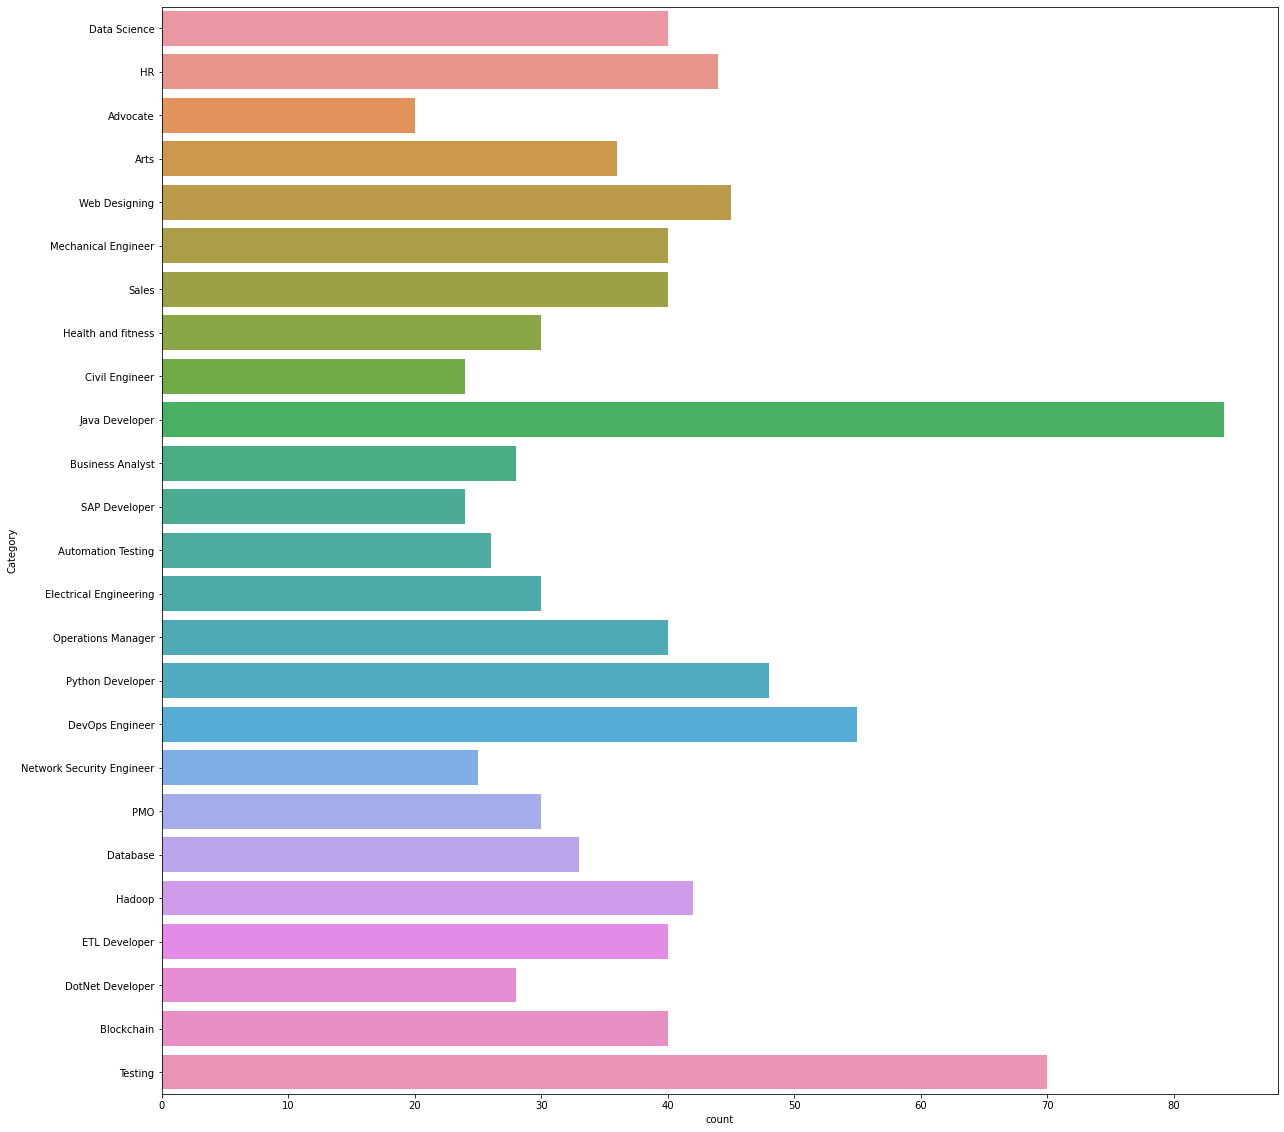

In [125]:
plt.figure(figsize=(20,20))
sns.countplot(y='Category',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

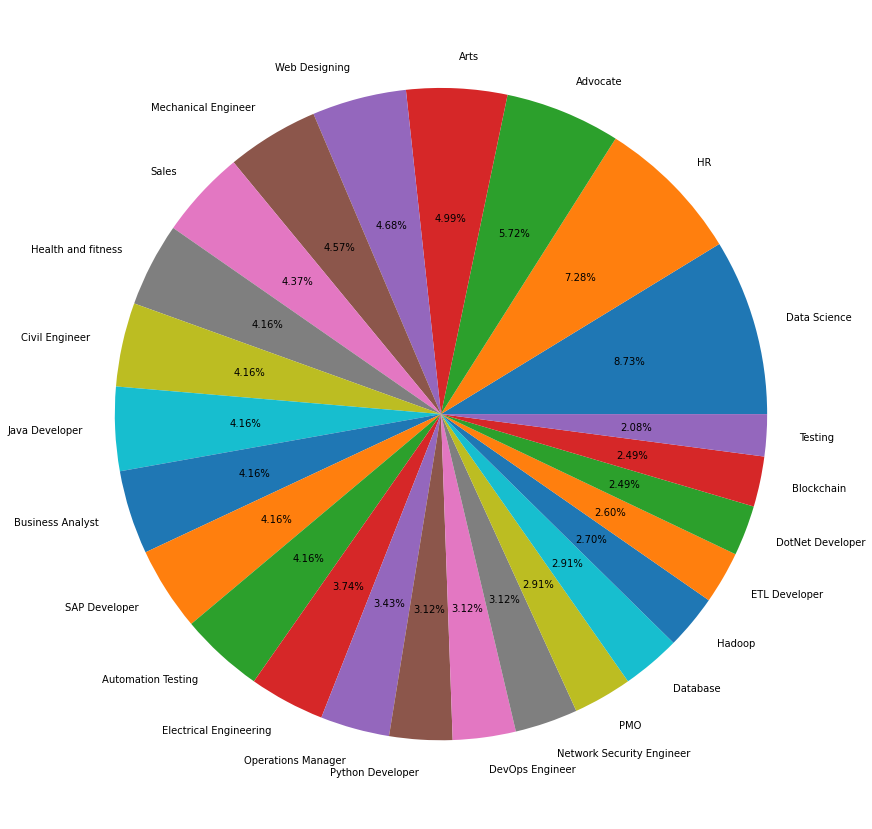

In [126]:
categories=list(df['Category'].unique())
percentage=df['Category'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(percentage,labels=categories,autopct='%1.2f%%')    
plt.show

In [127]:
##DATA CLEANING

In [128]:
import string
result=string.punctuation
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [129]:
df1=df.copy()

In [130]:
i=0
for resumeText in df1['Resume']:
    resumeText=re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText=re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText=re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText=re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText=resumeText.encode('ascii','ignore')
    resumeText=resumeText.decode()
    resumeText=re.sub('\s+', ' ', resumeText)# remove extra whitespace
    resumeText=resumeText.lower()
    df1['Resume'][i]=resumeText
    i+=1

In [131]:
df1.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 to may 2017 b e uit...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


In [132]:
label_enc=LabelEncoder()
df1['Category']=label_enc.fit_transform(df1['Category'])

In [133]:
df1.head()

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may 2013 to may 2017 b e uit...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...


In [134]:
df1['Category'].value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

In [135]:
StopWords = set(stopwords.words('english'))
stemmer=SnowballStemmer("english")
for i in range(len(df1)):
    words=df1['Resume'][i].split()
    words=[stemmer.stem(word) for word in words if word not in StopWords]
    df1['Resume'][i]=' '.join(words)

<ipython-input-135-83e63d2d108e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Resume'][i]=' '.join(words)


In [136]:
df1.head()

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 b e uit rgpv dat...
2,6,area interest deep learn control system design...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,educ detail mca ymcaust faridabad haryana data...


In [137]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df1['Resume'])

In [138]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
Y=df1['Category']

In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0, test_size=0.3)
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

In [142]:
from sklearn import metrics
print('Accuracy of SVM Classifier on training set: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(clf.score(X_test, Y_test)))

print("\n Classification report:\n" , (metrics.classification_report(Y_test, predictions)))

Accuracy of SVM Classifier on training set: 1.0000
Accuracy of SVM Classifier on test set: 0.9931

 Classification report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         4
       Automation Testing       0.89      1.00      0.94         8
               Blockchain       1.00      1.00      1.00        15
         Business Analyst       0.91      1.00      0.95        10
           Civil Engineer       1.00      1.00      1.00        10
             Data Science       1.00      1.00      1.00        14
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      0.87      0.93        15
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       1.00      1.00      1.00        13
    